In [1]:
import pandas as pd
import stanza
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string

In [2]:
df = pd.read_csv('datasets/dataframes/allrecipes_full_preproc.csv')

In [3]:
def stringfied_list_to_list(df, col):
    return df[col].apply(lambda x: eval(x))

def get_tokens(doc):
    return [token.text.lower()for sent in doc.sentences for token in sent.tokens if token.text.isalpha()]

def get_lemmas(doc, stop_words):
    return [word.lemma for sent in doc.sentences for word in sent.words if word.upos != 'PUNCT' and word.lemma not in stop_words]

def get_word_type_lemmas(doc,stop_words, word_type):
    return [word.lemma for sent in doc.sentences for word in sent.words if word.upos != 'PUNCT' and word.upos==word_type and word.lemma not in stop_words]

    

In [4]:
# Convert stringfied lists to lists
df["ingredients_list"] = stringfied_list_to_list(df, "ingredients_list")
df["categories_list"] = stringfied_list_to_list(df, "categories_list")
df["steps"] = stringfied_list_to_list(df, "steps")

In [5]:
# Select columns with text info
text_columns = ['recipe_name', 'description', 'ingredients_list', 'steps', 'reviews', 'main_category']
text_df = df[text_columns]

In [6]:
text_df['description'] = text_df.description.str.strip()
text_df['description'] = text_df.description.str.replace('"', '')
text_df.description.fillna('EMPTY', inplace=True)

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [7]:
text_df['steps'] = text_df.steps.apply(lambda x: [i.strip() for i in x])

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma', tokenize_no_ssplit=True)

2020-07-19 20:58:09 WARNING: Can not find mwt: default from official model list. Ignoring it.
2020-07-19 20:58:09 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |

2020-07-19 20:58:09 INFO: Use device: cpu
2020-07-19 20:58:09 INFO: Loading: tokenize
2020-07-19 20:58:09 INFO: Loading: pos
2020-07-19 20:58:15 INFO: Loading: lemma
2020-07-19 20:58:15 INFO: Done loading processors!


In [9]:
stop_words = set(stopwords.words('english')) 

In [10]:
text_df['description_lemmas'] = text_df.description.apply(lambda x: nlp(x))

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
text_df['description_tokens'] = text_df.description_lemmas.apply(lambda x: get_tokens(x))

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
text_df['clean_description_lemmas'] = text_df.description_lemmas.apply(lambda x: get_lemmas(x, stop_words))

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
text_df['clean_noun_lemmas'] = text_df.description_lemmas.apply(lambda x: get_word_type_lemmas(x, stop_words, 'NOUN'))

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
text_df['clean_adj_lemmas'] = text_df.description_lemmas.apply(lambda x: get_word_type_lemmas(x, stop_words, 'ADJ'))
text_df['clean_verb_lemmas'] = text_df.description_lemmas.apply(lambda x: get_word_type_lemmas(x, stop_words, 'VERB'))

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
text_df.head(10)

,recipe_name,description,ingredients_list,steps,reviews,main_category,description_lemmas,description_tokens,clean_description_lemmas,clean_noun_lemmas,clean_adj_lemmas,clean_verb_lemmas
0,Grilled Gingered Salmon,"This is one of my most requested recipes, and ...","[1 cup soy sauce, 1 cup muscovado (dark brown)...","[Whisk together the soy sauce, muscovado sugar...","[""This is really tasty, and really easy. Cut ...",Main Dish,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[this, is, one, of, my, most, requested, recip...","[one, request, recipe, never, crumb, leave, I,...","[recipe, crumb]",[],"[request, leave, make]"
1,Balsamic and Rosemary Grilled Salmon,This is a quick and easy way to grill salmon. ...,"[4 (4 ounce) salmon fillets, sea salt to taste...","[Season salmon fillets to taste with sea salt,...","[""This was fabulous. I didn't have sea salt so...",Main Dish,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[this, is, a, quick, and, easy, way, to, grill...","[quick, easy, way, grill, salmon, wonderful, s...","[way, salmon, asparagus, balsamic, butter, sau...","[quick, easy, wonderful, new]","[grill, serve, bake, boil]"
2,Grilled Salmon with Habanero-Lime Butter,"Grilled salmon marinated in orange juice, lime...","[1/4 cup vegetable oil, 1/2 cup orange juice, ...","[In a bowl, stir together vegetable oil, orang...","[""Wow this was probably among the top-three fi...",Main Dish,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[grilled, salmon, marinated, in, orange, juice...","[grill, salmon, marinate, orange, juice, lime,...","[salmon, orange, juice, lime, juice, tequila, ...",[spicy],"[grill, marinate, serve, remove, tame, wish, w..."
3,Grilled Salmon with Avocado Dip,This dip fits perfectly with grilled salmon. S...,"[2 avocados - peeled, pitted and diced, 2 clov...","[Preheat an outdoor grill for high heat, and l...","[""Great dip. If you can't find Greek style yog...",World Cuisine,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[this, dip, fits, perfectly, with, grilled, sa...","[dip, fit, perfectly, grill, salmon, serve, ri...","[dip, salmon, rice, style, yogurt, bit, yogurt]","[greek, sour, regular, plain]","[fit, grill, serve]"
4,Mocha Espresso Ice Cream,This is a rich dessert in which small servings...,"[2 cups heavy whipping cream, 1 1/2 cups whole...","[Mix heavy cream, whole milk, sugar, espresso,...","[""I wanted to love this recipe, but it was the...",Desserts,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[this, is, a, rich, dessert, in, which, small,...","[rich, dessert, small, serving, satisfying, be...","[dessert, serving, steak, beef, dinner]","[rich, small, satisfying, best]",[]
5,Strawberry Chocolate Chip Ice Cream,Strawberry ice cream and dark chocolate chips.,"[1 quart strawberries, hulled and sliced, 1 cu...","[Blend strawberries, 1/4 cup sugar, and lemon ...","[""Delicious! Creamy and flavorful. This may se...",Desserts,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[strawberry, ice, cream, and, dark, chocolate,...","[strawberry, ice, cream, dark, chocolate, chip]","[strawberry, ice, cream, chocolate, chip]",[dark],[]
6,Keto Strawberry Ice Cream,Keto-diet-friendly strawberry ice cream. I exp...,"[5 strawberries, hulled, 2 1/2 cups heavy whip...",[Place strawberries in a food processor or ble...,['I added 1tsp vodka (actually strawberry vodk...,Desserts,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[keto, diet, friendly, strawberry, ice, cream,...","[Keto, diet, friendly, strawberry, ice, cream,...","[diet, strawberry, ice, cream, lot, sweetener,...","[friendly, simple, real, better]","[experiment, arrive, taste]"
7,Caramel Macchiato Ice Cream,"Frozen Bliss: A frosty, homemade version of th...","[1 cup milk, 2 tablespoons instant coffee gran...","[Whisk together milk, instant coffee granules,...","[""This ice cream is good. No - I mean, this ic...",Desserts,"[\n [\n {\n ""id"": ""1"",\n ""text"":...","[frozen, bliss, a, frosty, homemade, version, ...","[freeze, Bliss, frosty, homemade, version, fam...","[version

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
text_df.groupby('main_category').size()

main_category
Appetizers and Snacks               656
Bread                               464
Breakfast and Brunch                694
Desserts                            659
Drinks                              717
Everyday Cooking                     55
Fruits and Vegetables                61
Main Dish                           367
Main Dishes                         324
Meat and Poultry                    424
Pasta and Noodles                    32
Salad                               939
Seafood                             341
Side Dish                           805
Soups, Stews and Chili              928
Trusted Brands: Recipes and Tips    550
World Cuisine                       958
dtype: int64

In [39]:
text_df.rating_score.quantile([0.1,0.25,0.5,0.75, .9])

0.10    4.074074
0.25    4.330000
0.50    4.534544
0.75    4.673704
0.90    4.791488
Name: rating_score, dtype: float64

In [68]:
#lemmas = text_df[text_df.main_category=='Trusted Brands: Recipes and Tips'].clean_description_lemmas.tolist()
lemmas = text_df[text_df.rating_score>4.8].clean_verb_lemmas.tolist()
lemmas = [item for sublist in lemmas for item in sublist if item not in ['recipe','make', 'use', 'dish', 'empty']]

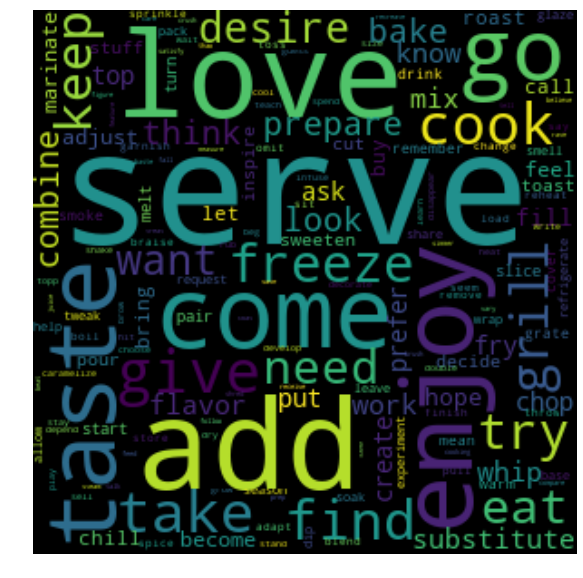

In [69]:
# Create the wordcloud object
wordcloud = WordCloud(width=300, height=300, margin=0, collocations=True).generate(" ".join(lemmas))

# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
 

In [70]:
wordcloud.words_

{'serve': 1.0,
 'add': 0.5873015873015873,
 'love': 0.5317460317460317,
 'come': 0.3492063492063492,
 'enjoy': 0.3333333333333333,
 'taste': 0.31746031746031744,
 'go': 0.2698412698412698,
 'give': 0.2619047619047619,
 'take': 0.25396825396825395,
 'cook': 0.23809523809523808,
 'find': 0.2222222222222222,
 'freeze': 0.21428571428571427,
 'grill': 0.21428571428571427,
 'try': 0.20634920634920634,
 'keep': 0.20634920634920634,
 'eat': 0.1984126984126984,
 'need': 0.18253968253968253,
 'desire': 0.16666666666666666,
 'want': 0.16666666666666666,
 'prepare': 0.14285714285714285,
 'think': 0.14285714285714285,
 'combine': 0.14285714285714285,
 'bake': 0.14285714285714285,
 'look': 0.1349206349206349,
 'substitute': 0.1349206349206349,
 'flavor': 0.12698412698412698,
 'whip': 0.12698412698412698,
 'work': 0.12698412698412698,
 'know': 0.12698412698412698,
 'mix': 0.11904761904761904,
 'create': 0.1111111111111111,
 'top': 0.1111111111111111,
 'ask': 0.1111111111111111,
 'put': 0.103174603174

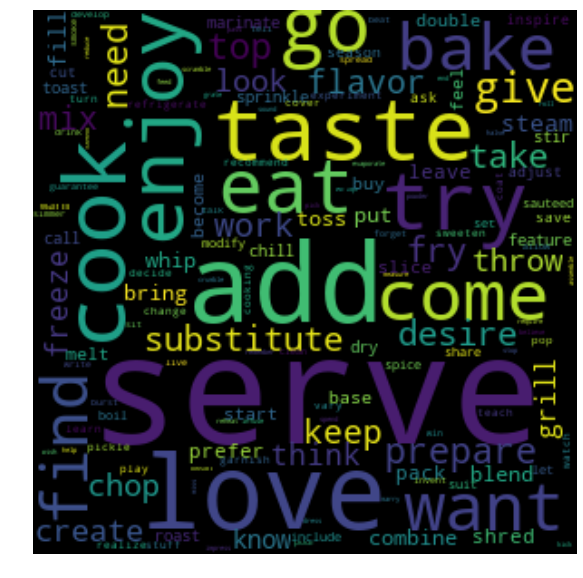

In [71]:
lemmas = text_df[text_df.rating_score<4.08].clean_verb_lemmas.tolist()
lemmas = [item for sublist in lemmas for item in sublist if item not in ['recipe','make', 'use', 'dish', 'empty']]

# Create the wordcloud object
wordcloud = WordCloud(width=300, height=300, margin=0, collocations=True).generate(" ".join(lemmas))

# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [19]:
import gensim

In [21]:
corpus = []
for index, row in text_df.iterrows():
    tagged_doc = gensim.models.doc2vec.TaggedDocument(row['description_tokens'], [index])
    corpus.append(tagged_doc)

In [23]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

2020-07-19 21:39:18 WARNING: consider setting layer size to a multiple of 4 for greater performance


In [25]:
model.build_vocab(corpus)

In [29]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [30]:
ranks = []
second_ranks = []
for doc_id in range(len(corpus)):
    inferred_vector = model.infer_vector(corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [69]:
print('Document ({}): «{}»\n'.format(6385, ' '.join(corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(corpus[sims[index][0]].words)))

Document (6385): «this recipe was handed down to me from my mother it easy to make and the ingredients are probably already in your kitchen enjoy»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d50,n5,w5,mc2,s0.001,t3):

MOST (8981, 0.8886877298355103): «i could find a recipe for beef pot pie so i made my own and it is great for those cold nights this is delicious»

SECOND-MOST (8221, 0.6386373043060303): «this marinade is delicious with beef but is great with pork or chicken too you will need to adjust the cooking time depending upon the meat or poultry you use for the skewers»

MEDIAN (4722, 0.2463856041431427): «prepare a flavorful summer salad by serving this dressing over mixed mesclun greens hearts of romaine sliced cucumber tomato and red onion»

LEAST (4398, -0.26993435621261597): «deeeeeelicious»



In [68]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(corpus[doc_id].words)), 'Rating:', df.rating_score[doc_id], '\n Name:', df.recipe_name[doc_id])
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(corpus[sim_id[0]].words)), 'Rating:', df.rating_score[sim_id[0]], '\n Name:', df.recipe_name[sim_id[0]])

Train Document (6385): «this recipe was handed down to me from my mother it easy to make and the ingredients are probably already in your kitchen enjoy»
 Rating: 4.518032786885246 
 Name: Best Ever Corn Muffins
Similar Document (8879, 0.7764100432395935): «this easy recipe for tilapia only takes a few minutes to prepare uses few ingredients and is flavorful»
 Rating: 4.499181669394435 
 Name: Easy Baked Tilapia
